Below are the imports I will need for the project, as well as their aliases.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this line of code, I read in the dataset, saving it to the variable "suicide". I then print the head.

In [60]:
suicide = pd.read_csv("who_suicide_statistics.csv")
suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


For this project, I will only be looking at cases in the US. Because of this, I need to make a subset of the data.

In [61]:
#I create a subset of suicide with only rows that have "United States of America" 
#as the value for "country."
suicides_US = suicide[suicide["country"] == "United States of America"]
#I reset the index.
suicides_US.reset_index(drop=True, inplace=True)
#I display the data
suicides_US

,country,year,sex,age,suicides_no,population
0,United States of America,1979,female,15-24 years,1001.0,21039000.0
1,United States of America,1979,female,25-34 years,1352.0,18176000.0
2,United States of America,1979,female,35-54 years,2458.0,24669000.0
3,United States of America,1979,female,5-14 years,48.0,17317000.0
4,United States of America,1979,female,55-74 years,1705.0,20097000.0
...,...,...,...,...,...,...
451,United States of America,2016,male,25-34 years,NaN,22511217.0
452,United States of America,2016,male,35-54 years,NaN,41481607.0
453,United States of America,2016,male,5-14 years,NaN,21313304.0
454,United States of America,2016,male,55-74 years,NaN,33121620.0


In [62]:
#I get the shape.
suicides_US.shape

(456, 6)

Here I will check for missing values.

In [63]:
suicides_US.isnull().sum()

country         0
year            0
sex             0
age             0
suicides_no    12
population      0
dtype: int64

Regrettably, the counts of suicides from 2016 are missing. Because it was localized to that one year
and I could not find another trustworthy data set that has those values, I opted to drop the rows for 
2016 instead.

In [64]:
#I set the variable to exclude rows where the year is 2016 and print the tail, which ends at 2015 now.
suicides_US = suicides_US[suicides_US.year != 2016]
suicides_US.tail()

,country,year,sex,age,suicides_no,population
439,United States of America,2015,male,25-34 years,5503.0,22137097.0
440,United States of America,2015,male,35-54 years,11634.0,41658010.0
441,United States of America,2015,male,5-14 years,255.0,21273987.0
442,United States of America,2015,male,55-74 years,9068.0,32264697.0
443,United States of America,2015,male,75+ years,3171.0,8171136.0


The next part of my project is to engineer a feature that puts into perspective the proportion of 
suicides to population in different age groups. To do this, I make a new feature consisting of the 
quotient of suicides_no and population.

In [65]:
#I create a new column called no_to_pop and assign it the quotient of suicides_no and population.
suicides_US["no_to_pop"] = suicides_US["suicides_no"] / suicides_US["population"]
suicides_US

<ipython-input-65-2ae3a76b6e7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicides_US["no_to_pop"] = suicides_US["suicides_no"] / suicides_US["population"]


,country,year,sex,age,suicides_no,population,no_to_pop
0,United States of America,1979,female,15-24 years,1001.0,21039000.0,0.000048
1,United States of America,1979,female,25-34 years,1352.0,18176000.0,0.000074
2,United States of America,1979,female,35-54 years,2458.0,24669000.0,0.000100
3,United States of America,1979,female,5-14 years,48.0,17317000.0,0.000003
4,United States of America,1979,female,55-74 years,1705.0,20097000.0,0.000085
...,...,...,...,...,...,...,...
439,United States of America,2015,male,25-34 years,5503.0,22137097.0,0.000249
440,United States of America,2015,male,35-54 years,11634.0,41658010.0,0.000279
441,United States of America,2015,male,5-14 years,255.0,21273987.0,0.000012
442,United States of America,2015,male,55-74 years,9068.0,32264697.0,0.000281


I now want to plot year and suicides_no together to see if there's been an overall increase, decrease,
or if it's just been fairly even.

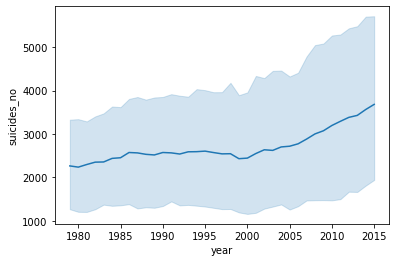

In [66]:
sns.lineplot(x = "year", y = "suicides_no", data = suicides_US)
plt.savefig("suicides_over_years.png")

In [67]:
s2015 = suicides_US[suicides_US["year"] == 2015]
num2015 = s2015["suicides_no"].sum() #44189 deaths in 2015
s2005 = suicides_US[suicides_US["year"] == 2005]
num2005 = s2005["suicides_no"].sum() #32629
num2005

32629.0

Horrifyingly enough, from 2005 and on the number of suicides in the US has been growing rapidly. Curious about age, I create a bar graph with age as the x axis and no_to_pop as the y, and found that suicide is much more common in those above the age of 75 than any other age group.

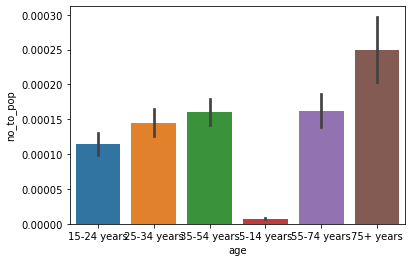

In [68]:
sns.barplot(x = "age", y = "no_to_pop", data = suicides_US)
plt.savefig("risk_and_age.png")

I now want to find differences in the total between men and women, and so I create two subsets, one 
for each.

In [69]:
suicides_men = suicides_US[suicides_US["sex"] != "female"]
suicides_women = suicides_US[suicides_US["sex"] != "male"]
suicides_men

,country,year,sex,age,suicides_no,population,no_to_pop
6,United States of America,1979,male,15-24 years,4245.0,21405000.0,0.000198
7,United States of America,1979,male,25-34 years,4505.0,17862000.0,0.000252
8,United States of America,1979,male,35-54 years,5207.0,23380000.0,0.000223
9,United States of America,1979,male,5-14 years,104.0,18075000.0,0.000006
10,United States of America,1979,male,55-74 years,4593.0,16689000.0,0.000275
...,...,...,...,...,...,...,...
439,United States of America,2015,male,25-34 years,5503.0,22137097.0,0.000249
440,United States of America,2015,male,35-54 years,11634.0,41658010.0,0.000279
441,United States of America,2015,male,5-14 years,255.0,21273987.0,0.000012
442,United States of America,2015,male,55-74 years,9068.0,32264697.0,0.000281


In [70]:
suicides_women

,country,year,sex,age,suicides_no,population,no_to_pop
0,United States of America,1979,female,15-24 years,1001.0,21039000.0,0.000048
1,United States of America,1979,female,25-34 years,1352.0,18176000.0,0.000074
2,United States of America,1979,female,35-54 years,2458.0,24669000.0,0.000100
3,United States of America,1979,female,5-14 years,48.0,17317000.0,0.000003
4,United States of America,1979,female,55-74 years,1705.0,20097000.0,0.000085
...,...,...,...,...,...,...,...
433,United States of America,2015,female,25-34 years,1444.0,21555712.0,0.000067
434,United States of America,2015,female,35-54 years,4053.0,41531809.0,0.000098
435,United States of America,2015,female,5-14 years,158.0,20342901.0,0.000008
436,United States of America,2015,female,55-74 years,2872.0,35115610.0,0.000082


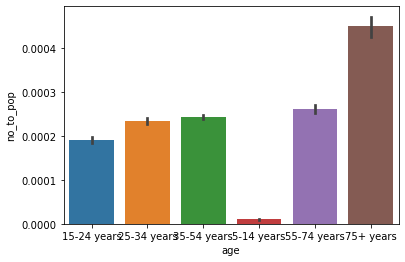

In [71]:
sns.barplot(x = "age", y = "no_to_pop", data = suicides_men)
plt.savefig("male_risk.png")

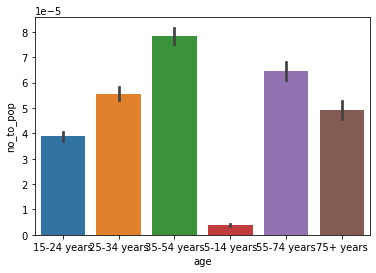

In [74]:
sns.barplot(x = "age", y = "no_to_pop", data = suicides_women)
plt.savefig("female_risk.png")

In [81]:
#Men commit suicide at around 3.7 times the rate of women.
sm = suicides_women["suicides_no"].sum()
sw = suicides_men["suicides_no"].sum()
ratio = sw / sm
ratio

3.737217527769125

Based on the graphs above, the most likely suicide victim is male and aged over 75. As a whole, men are far more likely to commit suicide. Women are most likely to be victims between the ages of 35 and 54. The trend seems to be that the number of 
suicides in the US is increasing at an alarming rate.

Questions:
Why does the likelihood of suicide rise for men with age but peak in middle years for women?
What is contributing to the rise in suicides for Americans?
Why are men as a whole at a much higher risk?